In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    '../data/split/train.csv',
    sep=',',
    quotechar='"',
    escapechar='\\',
    engine='python'
)

#Merge Date and Time columns into a single Datetime column
df['Datetime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    format='%Y-%m-%d %H:%M:%S.%f',
    errors='coerce'
)

df = df.set_index('Datetime').sort_index()

#Drop unnecessary columns
df = df.drop(['Date', 'Time', 'LineId'], axis=1)

df.head()

,Logfile,Pid,Level,Component,Context,Content,EventId,EventTemplate,ParameterList,Label
Datetime,,,,,,,,,,
2017-05-14 19:39:01.445,nova-api.log.2017-05-14_21:27:04,25746,INFO,nova.osapi_compute.wsgi.server,req-5a2050e7-b381-4ae9-92d2-8b08e9f9f4c0 113d3...,"10.11.10.1 ""GET /v2/54fadb412c4e40cdbaed9335e4...",c1d6825f,"<*> ""GET <*> HTTP<*>"" status: <*> len: <*> tim...","['10.11.10.1', '/v2/54fadb412c4e40cdbaed9335e4...",1
2017-05-14 19:39:01.650,nova-api.log.2017-05-14_21:27:04,25746,INFO,nova.osapi_compute.wsgi.server,req-c26a7d54-55ab-412e-947f-421a2cb934fc 113d3...,"10.11.10.1 ""GET /v2/54fadb412c4e40cdbaed9335e4...",c1d6825f,"<*> ""GET <*> HTTP<*>"" status: <*> len: <*> tim...","['10.11.10.1', '/v2/54fadb412c4e40cdbaed9335e4...",1
2017-05-14 19:39:02.007,nova-compute.log.2017-05-14_21:27:09,2931,INFO,nova.virt.libvirt.driver,req-e285b551-587f-4c1d-8eba-dceb2673637f 113d3...,[instance: 3edec1e4-9678-4a3a-a21b-a145a4ee5e6...,72f56ddb,[instance: <*>] <*> <*>,"['3edec1e4-9678-4a3a-a21b-a145a4ee5e61', 'Crea...",1
2017-05-14 19:39:02.924,nova-api.log.2017-05-14_21:27:04,25746,INFO,nova.osapi_compute.wsgi.server,req-eb681812-78ae-4a9f-9e2a-96e505285512 113d3...,"10.11.10.1 ""GET /v2/54fadb412c4e40cdbaed9335e4...",c1d6825f,"<*> ""GET <*> HTTP<*>"" status: <*> len: <*> tim...","['10.11.10.1', '/v2/54fadb412c4e40cdbaed9335e4...",1
2017-05-14 19:39:03.201,nova-api.log.2017-05-14_21:27:04,25746,INFO,nova.osapi_compute.wsgi.server,req-050312b7-c94e-4773-9319-c330e1f3fdaa 113d3...,"10.11.10.1 ""GET /v2/54fadb412c4e40cdbaed9335e4...",c1d6825f,"<*> ""GET <*> HTTP<*>"" status: <*> len: <*> tim...","['10.11.10.1', '/v2/54fadb412c4e40cdbaed9335e4...",1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145345 entries, 2017-05-14 19:39:01.445000 to 2017-05-17 12:02:35.320000
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Logfile        145345 non-null  object
 1   Pid            145345 non-null  int64 
 2   Level          145345 non-null  object
 3   Component      145345 non-null  object
 4   Context        145345 non-null  object
 5   Content        145345 non-null  object
 6   EventId        145345 non-null  object
 7   EventTemplate  145345 non-null  object
 8   ParameterList  145345 non-null  object
 9   Label          145345 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 12.2+ MB


In [3]:
log_template = df['EventTemplate']
print(f'Total log entries: {len(log_template)}')

number_of_templates = log_template.nunique()
print(f'Total unique log templates: {number_of_templates}')

Total log entries: 145345
Total unique log templates: 40


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(log_template)

print(vectorizer.get_feature_names_out())
print(f'Feature matrix shape: {X.shape}')  # (number of log entries, number of unique terms)

['_run_image_cache_manager_pass' 'active' 'affinity' 'allocated' 'and'
 'any' 'at' 'attempting' 'audit' 'auditing' 'available' 'bad' 'base'
 'build' 'checking' 'claim' 'cloudlab' 'code' 'complete' 'compute'
 'compute_service' 'computemanager' 'couldn' 'count' 'cp' 'cpu' 'created'
 'creating' 'data' 'database' 'deallocate' 'defaulting' 'delete'
 'deleting' 'deletion' 'did' 'disk' 'doctype' 'domain' 'during' 'error'
 'event' 'exception' 'failed' 'fetch' 'file' 'files' 'final' 'for' 'found'
 'free' 'from' 'get' 'has' 'host' 'html' 'http' 'hypervisor' 'id'
 'identity' 'image' 'in' 'instance' 'instancelist' 'instances' 'is' 'its'
 'len' 'lifecycle' 'limit' 'local' 'locally' 'match' 'memory' 'name'
 'network' 'no' 'node' 'nodes' 'not' 'obtain' 'of' 'on' 'operation' 'or'
 'other' 'pci_stats' 'pending' 'pg0' 'phys_disk' 'phys_ram' 'plugged'
 'post' 'power' 'public' 're' 'record' 'removable' 'remove' 'removing'
 'requested' 'resource' 'resources' 'response' 'running' 'server'
 'sharing' 'skip' 

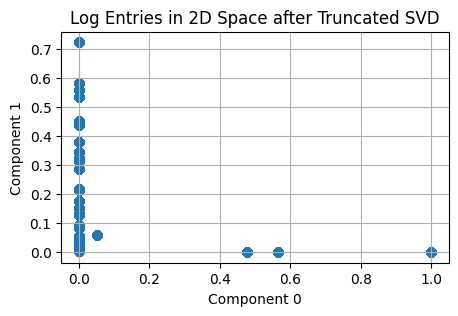

In [5]:
#Dimension reduction using TruncatedSVD
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=40)
X_reduced = svd.fit_transform(X)

plt.figure(figsize=(5, 3))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5)
plt.title('Log Entries in 2D Space after Truncated SVD')
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.grid()
plt.show()

In [6]:
terms = vectorizer.get_feature_names_out()
for i, comp in enumerate(svd.components_):
    terms_in_comp = zip(terms, comp)
    sorted_terms = sorted(terms_in_comp, key=lambda x: x[1], reverse=True)[:10]
    print(f"Component {i}:")
    for term, weight in sorted_terms:
        print(f"  {term}: {weight:.4f}")

Component 0:
  get: 0.4538
  len: 0.4466
  status: 0.4466
  time: 0.4466
  http: 0.4414
  post: 0.0295
  delete: 0.0089
  any: 0.0004
  no: 0.0004
  thrown: 0.0004
Component 1:
  instance: 0.7228
  on: 0.2222
  at: 0.2214
  image: 0.2214
  this: 0.2064
  lifecycle: 0.1917
  vm: 0.1917
  event: 0.1857
  checking: 0.1667
  successfully: 0.1035
Component 2:
  at: 0.4034
  image: 0.4034
  checking: 0.3911
  this: 0.2007
  on: 0.1742
  local: 0.1004
  nodes: 0.1004
  other: 0.1004
  sharing: 0.1004
  storage: 0.1004
Component 3:
  base: 0.5299
  files: 0.5299
  active: 0.5022
  checking: 0.1609
  at: 0.1591
  image: 0.1591
  removable: 0.0977
  this: 0.0658
  file: 0.0556
  on: 0.0524
Component 4:
  checking: 0.4595
  lifecycle: 0.2513
  vm: 0.2513
  event: 0.2398
  at: 0.2335
  image: 0.2335
  creating: 0.0080
  plugged: 0.0080
  vif: 0.0080
  no: 0.0062
Component 5:
  lifecycle: 0.4471
  vm: 0.4471
  event: 0.4226
  this: 0.1929
  on: 0.1392
  local: 0.0965
  nodes: 0.0965
  other: 0.0965

In [8]:
from joblib import dump
dump(vectorizer, '../models/tfidf_vectorizer.joblib')
dump(svd, '../models/truncated_svd.joblib')

['../models/truncated_svd.joblib']